# Convolutional Neural Networks (CNN)

* CNN's are also known as ConvNets

* They are also know for their capabilities to find patterns in visual data.

* Since we work with visual data classification, a CNN model is the missing piece in our problem 

![Alt test](images/cnn_table.png)
![Alt test](images/cnn_model.png)

## 0. Import Necessary Libraries

In [1]:
# PyTorch
import torch
from torch import nn

# torchvision
import torchvision
from torchvision import datasets, transforms 
from torchvision.transforms import ToTensor

# matplotlib
import matplotlib.pyplot as plt

# check versions (a good practice)
torch.__version__ , torchvision.__version__ 

('1.12.1+cu102', '0.13.1+cu102')

In [2]:
# Custom functions
import helpers

## 1. Data
### 1.1. Get Dataset with `torchvision.datasets`

In [3]:
# Training data
train_data = datasets.FashionMNIST(root="data",           # name of the data folder
                                   train=True,            # training data or not?
                                   download=True,         # want to download?
                                   transform=ToTensor(),  # transform data to tensors 
                                   target_transform=None) # transform target/labels?

# Testing data
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

In [4]:
# Data proparties
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
class_names = train_data.classes
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
# First image of the data set
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

* So the first image is an **ankle boot** image with the size of **28 x 28**

### ***(Excurse)*** Plot data with `matplotlib.pyplot`

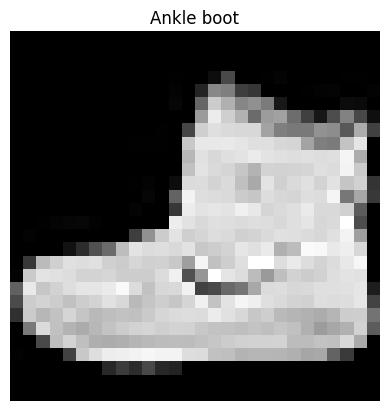

In [8]:
# Plot the first element of data
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray") # squeeze() cause matplot only accepts (X * X) format
plt.title(class_names[label])
plt.axis(False);

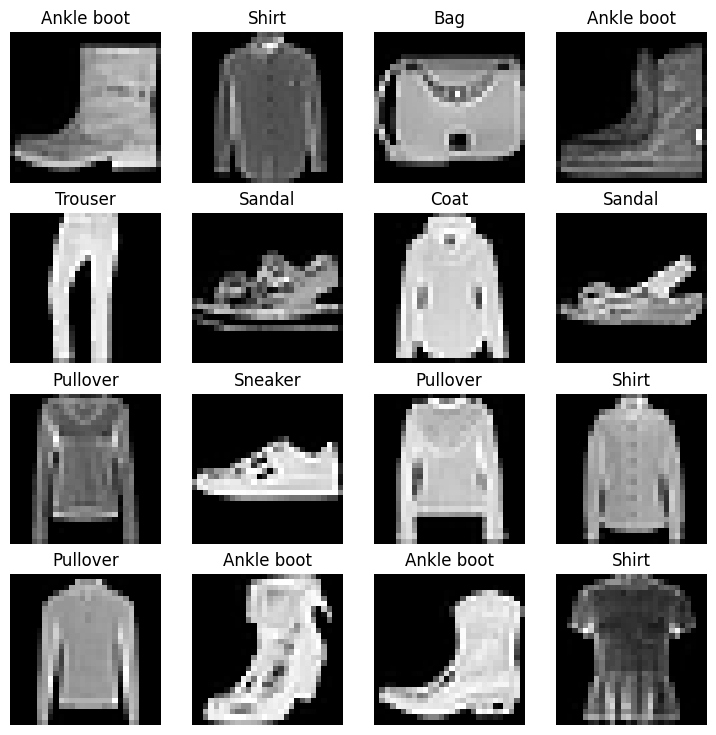

In [9]:
# Plot some random images
RANDOM_SEED = 42 # for reproducability
torch.manual_seed(RANDOM_SEED) 

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

### 1.2. Prepare Dataloaders with `torch.utils.data.Dataloaders`

* **Dataset** in PyTorch is a class that stores your samples and labels which lets you access a single item at a time:

    - Right now out data is in the form of datasets.

* **DataLoader** wraps your Dataset and allows you to loop through it automatically:

    - This makes our data iterable, we need that for training the data.

* Neural networks never train on one sample at a time (too slow, too unstable). Instead, DataLoader groups the data into **batches**.

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # VERY important, otherwise the acc is around 10%

In [11]:
# Dataloader proparties
len(train_dataloader), 60000/32, len(test_dataloader), 10000/32

(1875, 1875.0, 313, 312.5)

In [12]:
# What's inside
train_batch_images, train_batch_labels = next(iter(train_dataloader))
train_batch_images, train_batch_images.shape, train_batch_labels, train_batch_labels.shape


(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

* `iter(train_dataloader)` - creates an **iterator** over the DataLoader

* `next(...)` - fetches the **first batch** from the iterator

* `train_batch_images` -> all 32 input images of the first batch

* `train_batch_labels` -> all 32 output labels of the first batch 

***

* `torch.Size([32, 1, 28, 28])`-> **32** samples in the batch, **1** color channel, **28*28** images each

* `torch.Size([32])` -> **32** labels

### ***(Excurse)*** Plot a batch with `matplotlib.pyplot`

Image Shape: torch.Size([1, 28, 28]), Label Shape: torch.Size([])


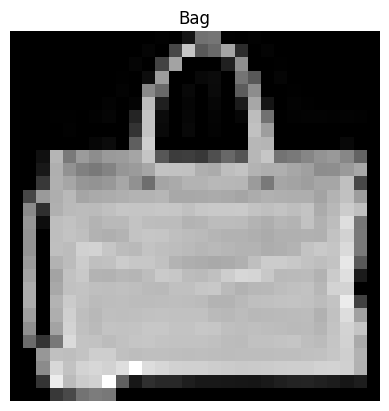

In [13]:
#torch.manual_seed(RANDOM_SEED)

random_idx = torch.randint(0, len(train_batch_images), size=[1]).item()
img, label = train_batch_images[random_idx], train_batch_labels[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Shape: {img.shape}, Label Shape: {label.shape}")

## 2. CNN Model
### 2.1. Setup Device-Agnostic Code

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
class FashionMNISTModel(nn.Module):
    """
    Model architecture that replicates TinyVGG model from CNN explainer website
    """
    def __init__(self,
                 input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(      # input_shape is the number of color channels in our images
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(          # the output layer is also called a classifier layer                
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a way to calculate this
                      out_features=output_shape)

        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")

        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")

        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")

        return x

In [16]:
# Create a device-agnostic instance of the model
model = FashionMNISTModel(input_shape=1, # input_shape is the number of color channels in our images
                          hidden_units=30,
                          output_shape=len(class_names)).to(device)
model

FashionMNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [17]:
# Create a dummy image tensor to test the model
rand_image_tensor = torch.randn(1, 28, 28).to(device)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [18]:
# Pass it through the model (error will occure if not calculated)
model(rand_image_tensor.unsqueeze(0)) # unsqueeze the 0th dimention, otherwise shape errors

tensor([[ 0.0400, -0.0070, -0.0353,  0.0110,  0.0047, -0.0199,  0.0396,  0.0009,
         -0.0184,  0.0176]], device='cuda:0', grad_fn=<AddmmBackward0>)

* Either `10 * 7 * 7 (hidden_units*7*7)` or `10*49 (hidden_units*7*7)` is what we need for the calculation

* The model works on the dummy data!

In [19]:
# Model proparties
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941],
                        [-0.2004,  0.0315, -0.3292]]],
              
              
                      [[[ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060],
                        [ 0.0520,  0.2693,  0.0364]]],
              
              
                      [[[-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927],
                        [-0.1457,  0.1924,  0.0596]]],
              
              
                      [[[ 0.1693, -0.2032, -0.3300],
                        [-0.1288, -0.2557,  0.2735],
                        [ 0.0960,  0.1381,  0.1054]]],
              
              
                      [[[-0.0058,  0.2609, -0.2368],
                        [ 0.0210, -0.2275,  0.1028],
                        [-0.1148,  0.1021, -0.0694]]],
              
              
      

### ***(Excurse)*** Braekdown on Conv2d and MaxPool2d:

`17.41.46 - 18.29.02`

### 2.2. Pick Loss Function & Optimizer & Other Metrics

In [20]:
loss_fn = nn.CrossEntropyLoss() # for multi-class classification problems
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.05)

## 3. Train & Test

In [21]:
from helpers import accuracy_fn, print_train_time, train_step, test_step

from timeit import default_timer as timer
from tqdm.auto import tqdm

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED) # Because our code runs on GPU

# Measure time
start = timer()

# Set epochs
epochs = 10

for epoch in tqdm(range(epochs)): # wraps a progression bar around our epochs
    print(f"Epoch: {epoch}\n---------")

    # Train data
    train_step(model=model,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    # Test data
    test_step(model=model,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
end = timer()
train_time = print_train_time(start=start,
                              end=end,
                              device=device)




  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.6637 | Train accuracy: 75.96%
Test loss: 0.3956 | Test accuracy: 85.84%
Epoch: 1
---------
Train loss: 0.3497 | Train accuracy: 87.33%
Test loss: 0.3299 | Test accuracy: 88.01%
Epoch: 2
---------
Train loss: 0.2992 | Train accuracy: 89.24%
Test loss: 0.2944 | Test accuracy: 89.41%
Epoch: 3
---------
Train loss: 0.2693 | Train accuracy: 90.39%
Test loss: 0.2810 | Test accuracy: 89.85%
Epoch: 4
---------
Train loss: 0.2494 | Train accuracy: 91.06%
Test loss: 0.2703 | Test accuracy: 90.27%
Epoch: 5
---------
Train loss: 0.2327 | Train accuracy: 91.66%
Test loss: 0.2644 | Test accuracy: 90.68%
Epoch: 6
---------
Train loss: 0.2195 | Train accuracy: 92.06%
Test loss: 0.2496 | Test accuracy: 90.61%
Epoch: 7
---------
Train loss: 0.2091 | Train accuracy: 92.41%
Test loss: 0.2393 | Test accuracy: 91.10%
Epoch: 8
---------
Train loss: 0.1979 | Train accuracy: 92.87%
Test loss: 0.2367 | Test accuracy: 91.56%
Epoch: 9
---------
Train loss: 0.1896 | Train accuracy:

## 4. Evaluate Model

In [22]:
from helpers import eval_model
model_results = eval_model(model=model,
                           data_loader=test_dataloader, # this would be a separate dataloader in our case
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FashionMNISTModel',
 'model_loss': 0.24172258377075195,
 'model_acc': 91.58346645367412,
 'device': 'cuda'}

## 5. Make and evaluate random predictions with best model

In [49]:
import random

# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

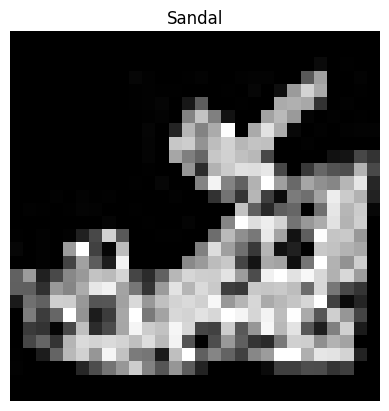

In [50]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [51]:
# Make predictions
from helpers import make_predictions
pred_probs = make_predictions(model=model,
                              data=test_samples,
                              device=device)

# View first two prediction probabilities
pred_probs[:2]

tensor([[2.0915e-10, 6.9091e-13, 3.6047e-11, 1.1241e-10, 2.1018e-11, 1.0000e+00,
         9.6590e-10, 1.1581e-08, 1.4854e-07, 1.0787e-07],
        [9.9416e-01, 4.6135e-07, 2.8519e-03, 9.0279e-05, 7.8801e-04, 1.3348e-08,
         1.8875e-03, 1.2243e-08, 2.1821e-04, 1.5794e-06]])

In [52]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 6, 3, 3, 3, 7, 6, 8])

In [53]:
test_labels

[5, 0, 6, 3, 3, 3, 7, 6, 8]

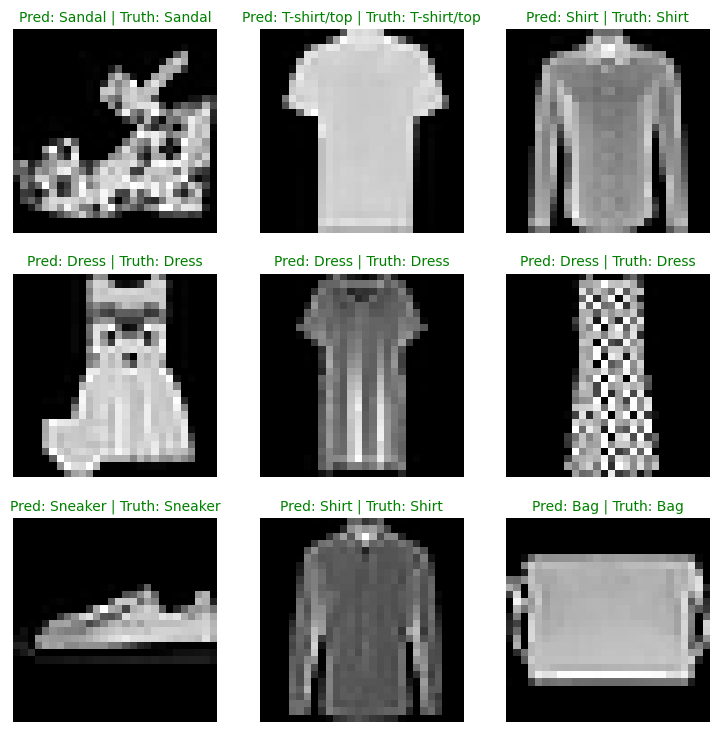

In [54]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

**18.44.22 - 19.44.05** are about better ploting images and compareing models, those can be helpful. But other that, you have the essentials.